In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fd=pd.read_csv('Credit_Card_Applications.csv')

In [4]:
fd

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
from sklearn.model_selection import train_test_split
fd['Class'] = pd.Categorical(fd['Class'], categories=[0, 1])
fd = fd.dropna(subset=['Class'])

X = fd.drop('Class', axis=1)
y = fd['Class']

# Assuming 'X' feature data and 'y'target variable
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42

)

"train shape",X_train.shape,"Val shape",X_val.shape,"test shape",X_test.shape

('train shape', (483, 15), 'Val shape', (103, 15), 'test shape', (104, 15))

In [6]:
# Assuming 'ID' is the name of the customer ID column
X_train = X_train.drop('CustomerID', axis=1)
X_val = X_val.drop('CustomerID', axis=1)
X_test = X_test.drop('CustomerID', axis=1)

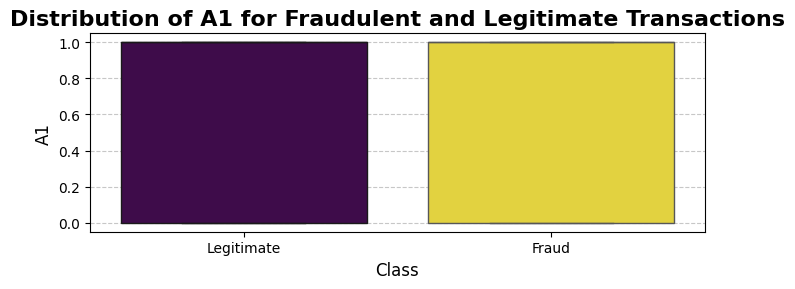

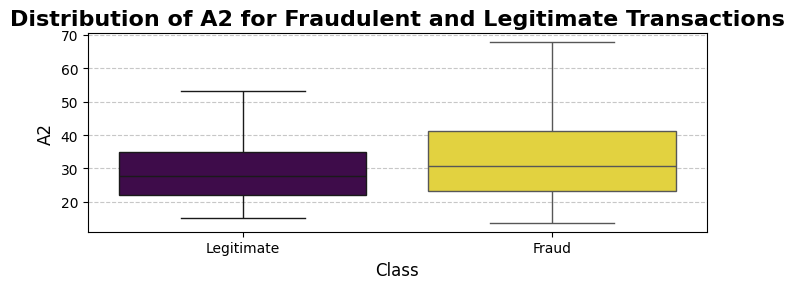

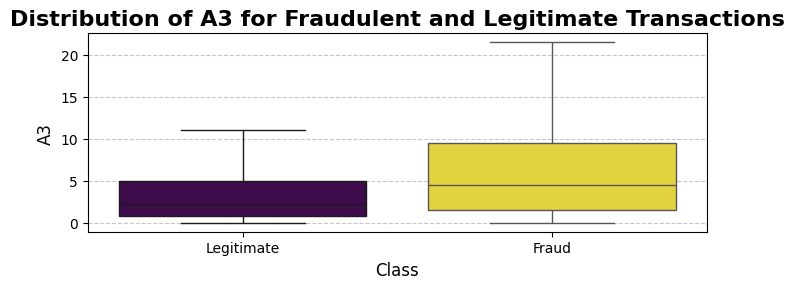

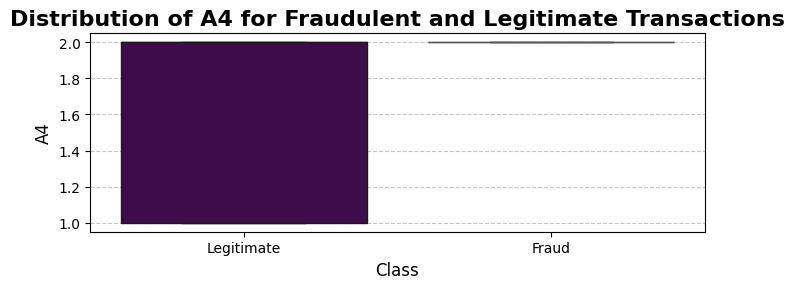

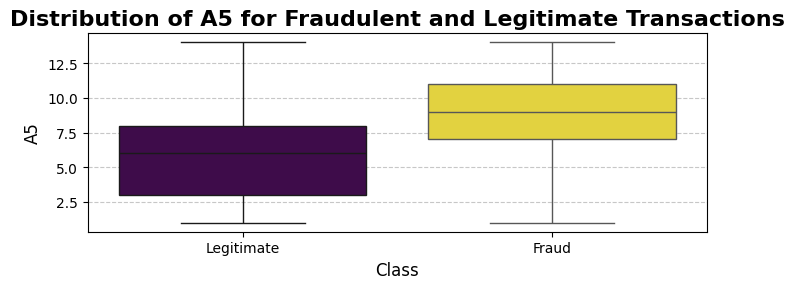

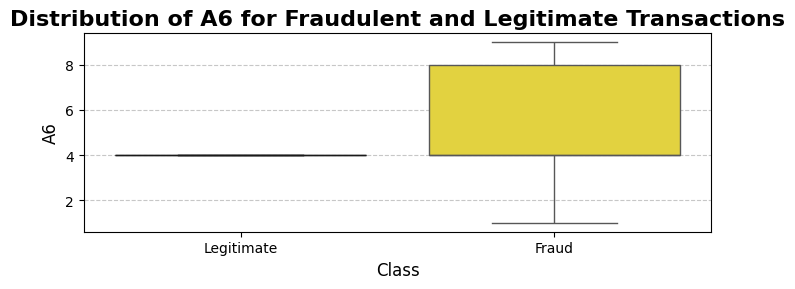

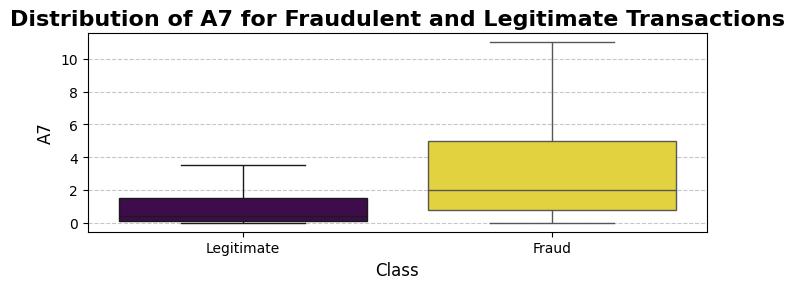

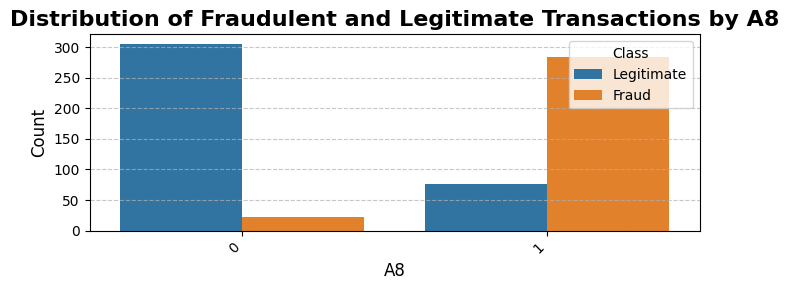

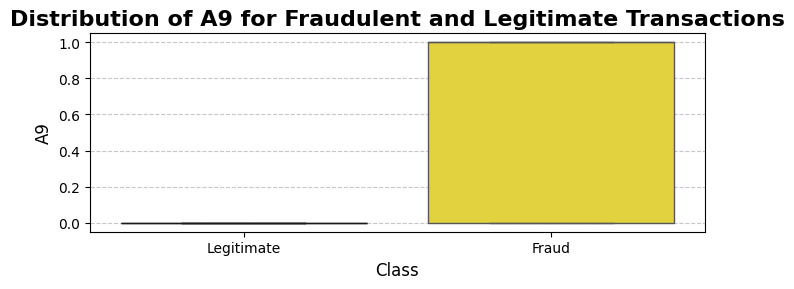

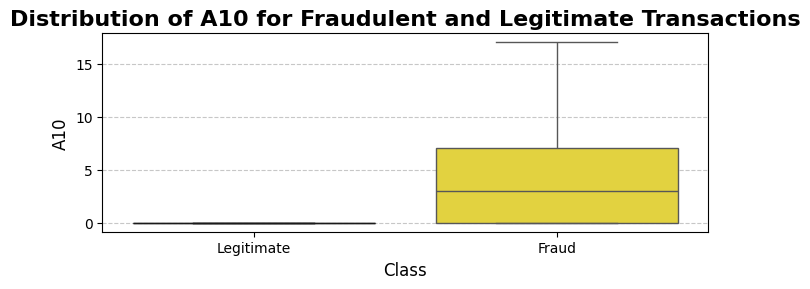

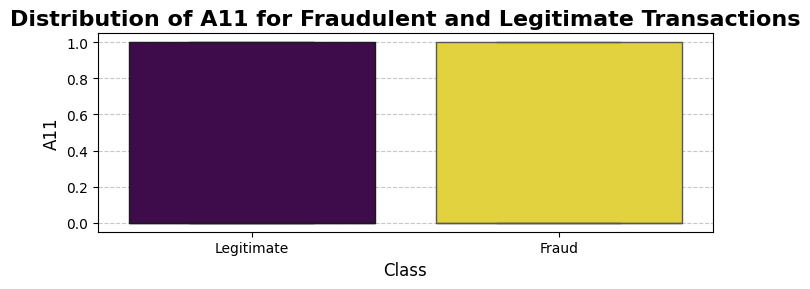

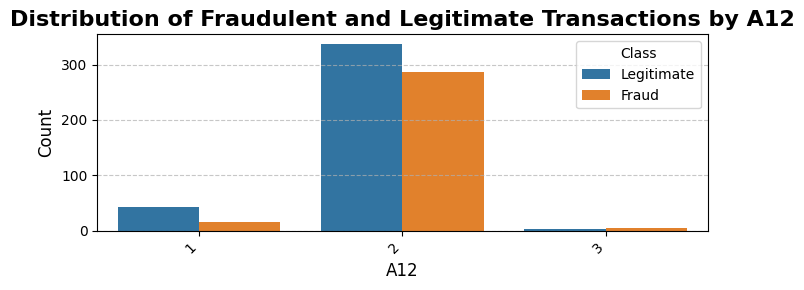

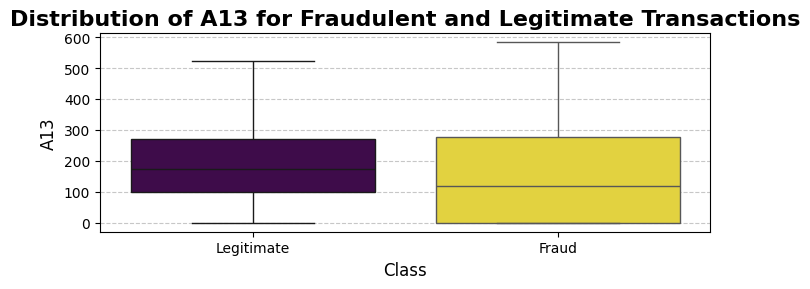

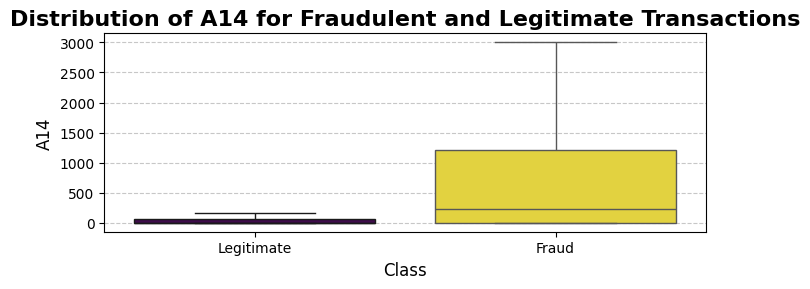

In [7]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

X['A8'] = X['A8'].astype('object')
X['A12'] = X['A12'].astype('object')

unique_classes = fd['Class'].unique()
num_classes = len(unique_classes)

# Get the colormap using cm.get_cmap()
colors = matplotlib.colormaps['viridis'].resampled(num_classes).colors

# Single-line code for each feature
for feature in X.columns:
    # Skip 'CustomerID' for box plots as it has been removed
    if feature == 'CustomerID':
        continue
    if feature in ('A8','A12'):
        plt.figure(figsize=(7, 3)); sns.countplot(x=feature, hue='Class', data=fd); plt.title(f'Distribution of Fraudulent and Legitimate Transactions by {feature}', fontsize=16, fontweight='bold'); plt.xlabel(feature, fontsize=12); plt.ylabel('Count', fontsize=12);plt.xticks(rotation=45, ha='right', fontsize=10); plt.legend(title='Class', loc='upper right', fontsize=10, labels=['Legitimate', 'Fraud']); plt.grid(axis='y', linestyle='--', alpha=0.7); plt.tight_layout(); plt.show()
    elif X[feature].dtype == 'object':
        plt.figure(figsize=(7, 3)); sns.countplot(x=feature, hue='Class', data=fd); plt.title(f'Distribution of Fraudulent and Legitimate Transactions by {feature}', fontsize=16, fontweight='bold'); plt.xlabel(feature, fontsize=12); plt.ylabel('Count', fontsize=12); plt.xticks(rotation=45, ha='right', fontsize=10); plt.legend(title='Class', loc='upper right', fontsize=10, labels=['Legitimate', 'Fraud']); plt.grid(axis='y', linestyle='--', alpha=0.7); plt.tight_layout(); plt.show()
    else:
        plt.figure(figsize=(7, 3)); [sns.boxplot(x='Class', y=feature, data=fd[fd['Class'] == class_val], color=colors[i], showfliers=False) for i, class_val in enumerate(unique_classes)]; plt.title(f'Distribution of {feature} for Fraudulent and Legitimate Transactions', fontsize=16, fontweight='bold'); plt.xlabel('Class', fontsize=12); plt.ylabel(feature, fontsize=12); ticks, labels = plt.xticks(); plt.xticks(ticks, ['Legitimate', 'Fraud'], fontsize=10); plt.yticks(fontsize=10); plt.grid(axis='y', linestyle='--', alpha=0.7); plt.tight_layout(); plt.show()

In [8]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
19,0,22.42,5.665,2,11,4,2.585,1,1,7,0,2,129,3258
482,1,20.42,0.000,2,8,4,0.000,0,0,0,0,3,184,1
101,1,38.67,0.210,2,4,4,0.085,1,0,0,1,2,280,1
398,1,23.25,12.625,2,8,4,0.125,0,1,2,0,2,0,5553
311,0,49.00,1.500,2,5,3,0.000,1,0,0,1,2,100,28


In [38]:
y_train.head()

,Class
19,1
482,0
101,1
398,0
311,0


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 19 to 28
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      483 non-null    int64  
 1   A2      483 non-null    float64
 2   A3      483 non-null    float64
 3   A4      483 non-null    int64  
 4   A5      483 non-null    int64  
 5   A6      483 non-null    int64  
 6   A7      483 non-null    float64
 7   A8      483 non-null    int64  
 8   A9      483 non-null    int64  
 9   A10     483 non-null    int64  
 10  A11     483 non-null    int64  
 11  A12     483 non-null    int64  
 12  A13     483 non-null    int64  
 13  A14     483 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 56.6 KB


In [11]:
X_train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,0.650104,31.603354,4.635776,1.778468,7.401656,4.606625,2.197919,0.509317,0.434783,2.476190,0.465839,1.925466,184.498965,944.648033
std,0.477432,11.938978,4.860353,0.420669,3.693686,1.958733,3.355205,0.500432,0.496242,5.041833,0.499349,0.299781,154.574243,4152.028606
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,22.670000,0.980000,2.000000,4.000000,4.000000,0.125000,0.000000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000
50%,1.000000,28.750000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,4.000000
75%,1.000000,38.500000,7.000000,2.000000,10.000000,5.000000,2.500000,1.000000,1.000000,3.000000,1.000000,2.000000,280.000000,335.000000
max,1.000000,74.830000,26.335000,3.000000,14.000000,9.000000,20.000000,1.000000,1.000000,67.000000,1.000000,3.000000,980.000000,51101.000000


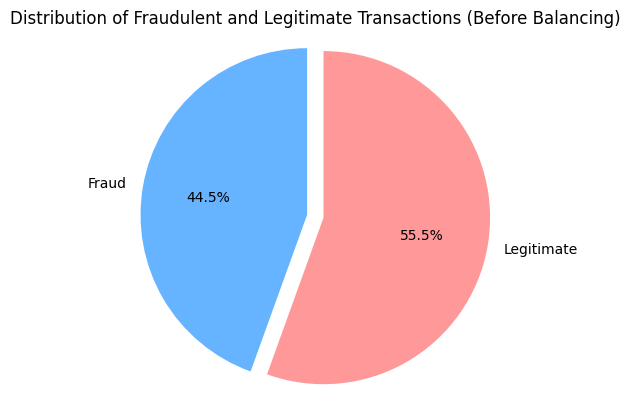

In [13]:
import matplotlib.pyplot as plt


fraud_percentage_before = (fd['Class'].value_counts(normalize=True)[1]) * 100
legitimate_percentage_before = (fd['Class'].value_counts(normalize=True)[0]) * 100

# Data for the pie chart
labels = ['Fraud', 'Legitimate']
sizes = [fraud_percentage_before, legitimate_percentage_before]
colors = [ '#66b3ff','#ff9999']  # Light red for Fraud, Light blue for Legitimate
explode = (0.1, 0)  # Explode the Fraud slice


plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Fraudulent and Legitimate Transactions (Before Balancing)')
plt.show()

In [14]:
class_counts = y_train.value_counts()
print(class_counts)

Class
0    268
1    215
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures

# Create interaction features
X_train['A2_A3_interaction'] = X_train['A2'].values * X_train['A3'].values # Access the values to ensure single column output
X_val['A2_A3_interaction'] = X_val['A2'].values * X_val['A3'].values
X_test['A2_A3_interaction'] = X_test['A2'].values * X_test['A3'].values
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
# Fit on the columns used for polynomial features
poly.fit(X_train[['A2', 'A3']])

poly_features_train = poly.transform(X_train[['A2', 'A3']])
poly_features_val = poly.transform(X_val[['A2', 'A3']])
poly_features_test = poly.transform(X_test[['A2', 'A3']])

# Get feature names after fitting
feature_names = poly.get_feature_names_out(X_train[['A2', 'A3']].columns)

poly_df_train = pd.DataFrame(poly_features_train, columns=feature_names, index=X_train.index)
poly_df_val = pd.DataFrame(poly_features_val, columns=feature_names, index=X_val.index)
poly_df_test = pd.DataFrame(poly_features_test, columns=feature_names, index=X_test.index)

X_train = pd.concat([X_train, poly_df_train], axis=1)
X_val = pd.concat([X_val, poly_df_val], axis=1)
X_test = pd.concat([X_test, poly_df_test], axis=1)

In [39]:

scaler = RobustScaler()
numerical_features = X_train.select_dtypes(include=['number']).columns

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])




In [18]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample X_train and y_train
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)
x_val_balanced, y_val_balanced = smote.fit_resample(X_val, y_val)

print("Shape of balanced X_train:", X_train_balanced.shape)
print("Shape of balanced y_train:", y_train_balanced.shape)


Shape of balanced X_train: (536, 20)
Shape of balanced y_train: (536,)


In [19]:
# Print the value counts of the balanced y_train
print(y_train_balanced.value_counts())

Class
0    268
1    268
Name: count, dtype: int64


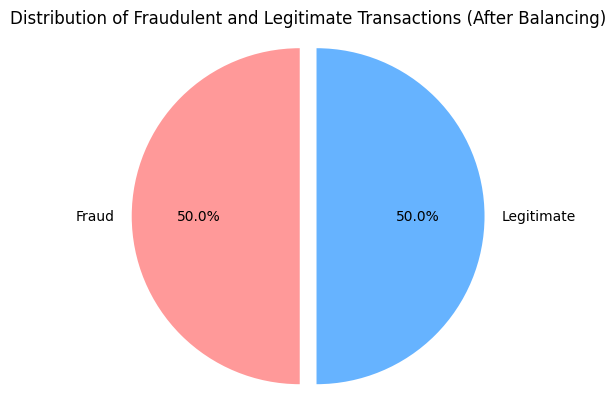

In [20]:


# Get class counts after balancing
class_counts_balanced = y_train_balanced.value_counts()

# Data for the pie chart
labels = ['Fraud', 'Legitimate']
sizes = [class_counts_balanced[1], class_counts_balanced[0]]
colors = ['#ff9999', '#66b3ff']  # Light red for Fraud, Light blue for Legitimate
explode = (0.1, 0)  # Explode the Fraud slice

# Create and display the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Fraudulent and Legitimate Transactions (After Balancing)')
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
dt=DecisionTreeClassifier()
dt.fit(X_train_balanced,y_train_balanced)
y_pred=dt.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy in training data:",dt.score(X_train_balanced,y_train_balanced))
print(f"Accuracy in validation data: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy in training data: 1.0
Accuracy in validation data: 0.8543689320388349
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        57
           1       0.82      0.87      0.84        46

    accuracy                           0.85       103
   macro avg       0.85      0.86      0.85       103
weighted avg       0.86      0.85      0.85       103

Confusion Matrix:
 [[48  9]
 [ 6 40]]


In [25]:
rf=RandomForestClassifier()
rf.fit(X_train_balanced,y_train_balanced)
y_pred=rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy in training data:",rf.score(X_train_balanced,y_train_balanced))
print(f"Accuracy in validation data: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy in training data: 1.0
Accuracy in validation data: 0.8252427184466019
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.83        57
           1       0.75      0.91      0.82        46

    accuracy                           0.83       103
   macro avg       0.83      0.83      0.83       103
weighted avg       0.84      0.83      0.83       103

Confusion Matrix:
 [[43 14]
 [ 4 42]]


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    scoring='f1',  # Use F1-score for evaluation (you can change this)
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = random_search.best_estimator_

# Make predictions on the validation set
y_pred = best_rf_model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': False}
Accuracy: 0.8640776699029126
F1-Score: 0.86
Precision: 0.7962962962962963
Recall: 0.9347826086956522
ROC AUC: 0.8709000762776508
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        57
           1       0.80      0.93      0.86        46

    accuracy                           0.86       103
   macro avg       0.87      0.87      0.86       103
weighted avg       0.88      0.86      0.86       103

Confusion Matrix:
 [[46 11]
 [ 3 43]]


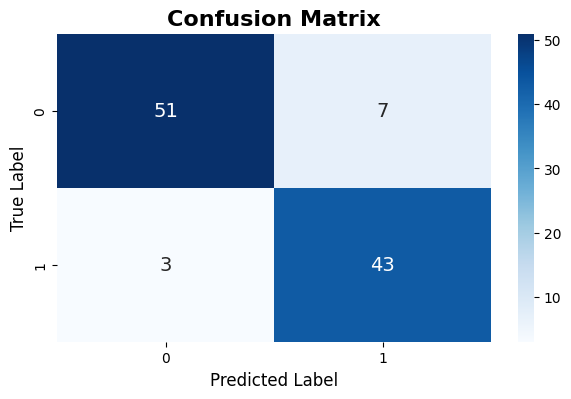

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        58
           1       0.86      0.93      0.90        46

    accuracy                           0.90       104
   macro avg       0.90      0.91      0.90       104
weighted avg       0.91      0.90      0.90       104



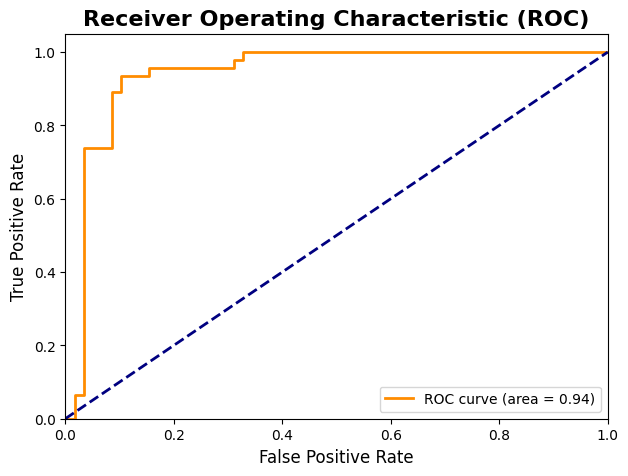

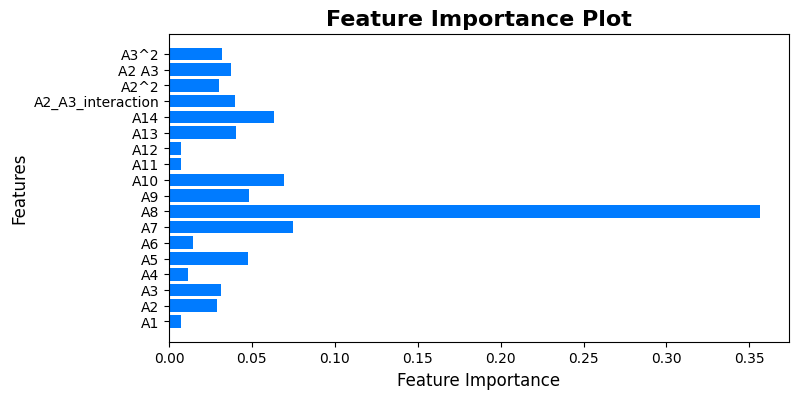

In [27]:
colors = ["#007bff", "#dc3545"]
sns.set_palette(sns.color_palette(colors))

# Confusion Matrix
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})  # Larger annotation
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))  # No visual changes needed here

# ROC Curve
from sklearn.metrics import roc_curve, auc
y_prob = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)  # Red curve
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC)", fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.show()

# Feature Importance
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 4))
plt.barh(features, feature_importances, color="#007bff")  # Blue bars
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance Plot", fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [28]:
X_train_reset = X_train_balanced.reset_index(drop=True)

In [29]:
predictions = best_rf_model.predict(X_train_balanced)

# Create a DataFrame with predictions and actual values (assuming 'Class' column in original data)
results_df = pd.DataFrame({'Prediction': predictions, 'Actual': y_train_balanced}) # Assuming y_train contains actual labels
results_df = results_df.reset_index(drop=True)
# Print predictions with labels
for index, row in results_df.iterrows():
    prediction = row['Prediction']
    actual = row['Actual']

    if prediction == 1:
        prediction_label = "Fraud"
    else:
        prediction_label = "Legitimate"

    print(f"Index: {index}, Prediction: {prediction_label}, Actual: {actual}")


Index: 0, Prediction: Fraud, Actual: 1
Index: 1, Prediction: Legitimate, Actual: 0
Index: 2, Prediction: Fraud, Actual: 1
Index: 3, Prediction: Legitimate, Actual: 0
Index: 4, Prediction: Legitimate, Actual: 0
Index: 5, Prediction: Legitimate, Actual: 0
Index: 6, Prediction: Legitimate, Actual: 0
Index: 7, Prediction: Legitimate, Actual: 0
Index: 8, Prediction: Fraud, Actual: 1
Index: 9, Prediction: Legitimate, Actual: 0
Index: 10, Prediction: Legitimate, Actual: 0
Index: 11, Prediction: Legitimate, Actual: 0
Index: 12, Prediction: Legitimate, Actual: 0
Index: 13, Prediction: Fraud, Actual: 1
Index: 14, Prediction: Legitimate, Actual: 0
Index: 15, Prediction: Fraud, Actual: 1
Index: 16, Prediction: Fraud, Actual: 1
Index: 17, Prediction: Fraud, Actual: 1
Index: 18, Prediction: Legitimate, Actual: 0
Index: 19, Prediction: Legitimate, Actual: 0
Index: 20, Prediction: Legitimate, Actual: 0
Index: 21, Prediction: Legitimate, Actual: 0
Index: 22, Prediction: Legitimate, Actual: 0
Index: 23,

In [30]:
accuracy = accuracy_score(y_train_balanced, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.81%


In [40]:
X_test_reset = X_test.reset_index(drop=True)


In [32]:
predictions = best_rf_model.predict(X_test_balanced)

# Create a DataFrame with predictions and actual values (assuming 'Class' column in original data)
results_df = pd.DataFrame({'Prediction': predictions, 'Actual': y_test_balanced}) # Assuming y_train contains actual labels
results_df = results_df.reset_index(drop=True)
# Print predictions with labels
for index, row in results_df.iterrows():
    prediction = row['Prediction']
    actual = row['Actual']

    if prediction == 1:
        prediction_label = "Fraud"
    else:
        prediction_label = "Legitimate"

    print(f"Index: {index}, Prediction: {prediction_label}, Actual: {actual}")


Index: 0, Prediction: Legitimate, Actual: 0
Index: 1, Prediction: Legitimate, Actual: 0
Index: 2, Prediction: Legitimate, Actual: 0
Index: 3, Prediction: Fraud, Actual: 1
Index: 4, Prediction: Legitimate, Actual: 0
Index: 5, Prediction: Legitimate, Actual: 0
Index: 6, Prediction: Fraud, Actual: 1
Index: 7, Prediction: Legitimate, Actual: 1
Index: 8, Prediction: Legitimate, Actual: 0
Index: 9, Prediction: Legitimate, Actual: 0
Index: 10, Prediction: Fraud, Actual: 1
Index: 11, Prediction: Fraud, Actual: 1
Index: 12, Prediction: Fraud, Actual: 1
Index: 13, Prediction: Fraud, Actual: 1
Index: 14, Prediction: Legitimate, Actual: 1
Index: 15, Prediction: Fraud, Actual: 1
Index: 16, Prediction: Fraud, Actual: 0
Index: 17, Prediction: Legitimate, Actual: 0
Index: 18, Prediction: Legitimate, Actual: 0
Index: 19, Prediction: Legitimate, Actual: 0
Index: 20, Prediction: Legitimate, Actual: 0
Index: 21, Prediction: Fraud, Actual: 1
Index: 22, Prediction: Legitimate, Actual: 0
Index: 23, Predictio

In [33]:
class_counts = y_test_balanced.value_counts()

print("Legitimate Transactions:", class_counts[0])
print("Fraudulent Transactions:", class_counts[1])

Legitimate Transactions: 58
Fraudulent Transactions: 58


In [35]:
accuracy = accuracy_score(y_test_balanced, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.79%
